# Method 1- Linear Regression

# Linear Regression on Olympic 100m Gold Times

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQTrYpw1FCRAqMEsZJRBr30sotdaZvia4NgQAWiJEuK13DAgnsZ)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/olympic100m.csv"

# read the file into python using read_csv
df = pd.read_csv(file_name)

#print out the first rows
df.head(40)

,year,time
0,1896,12.00
1,1900,11.00
2,1904,11.00
3,1906,11.20
4,1908,10.80
5,1912,10.80
6,1920,10.80
7,1924,10.60
8,1928,10.80
9,1932,10.30


In [2]:
df.shape

(29, 2)

In [3]:
x = df['year']
x.shape

(29,)

In [4]:
# Format data into correct shape
x_train = np.array(x).reshape((-1, 1))
x_train.shape

(29, 1)

In [5]:
y_train = np.array(df['time'])

In [6]:
y_train.shape

(29,)

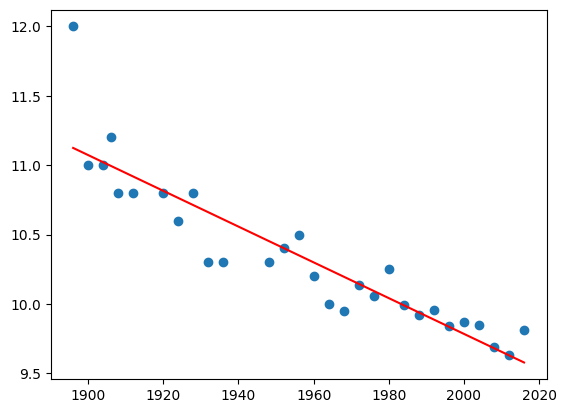

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Let's create the model object using LinearRegression
model = LinearRegression()

# Fit our model to our input data x and y
model.fit(x_train, y_train)


y_pred = model.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x, y_pred, color='r')

In [8]:
# Predict for 2020 Olympics

x_2020 = np.array([2020]).reshape(-1, 1)
x_2020.shape

(1, 1)

In [9]:
model.predict(x_2020)

array([9.52679525])

In [10]:
# How to apply polynomial regressions to this dataset?
# Step 1: Extract X and Y
# x = df.iloc[:, 1:2].values 

# Extract our y or target variable Pressure
# y = df.iloc[:, 2].values 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
  
poly1 = PolynomialFeatures(degree = 9) 
model_Poly1 = poly1.fit_transform(x_train) 
  
lin_poly1 = LinearRegression() 
lin_poly1.fit(model_Poly1, y_train) 

lin_poly1.predict(poly1.fit_transform(x_2020))


array([9.52389395])

# Polynomial Regressions

In [11]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Importing the dataset 
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/polylinearregression.csv"
df = pd.read_csv(file_name)
df.head(7)

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [12]:
# Extract our x values, the column Temperature
x = df.iloc[:, 1:2].values 

# Extract our y or target variable Pressure
y = df.iloc[:, 2].values 

In [13]:
x

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]], dtype=int64)

In [14]:
# Fitting Polynomial Regression to the dataset 
# Fitting the Polynomial Regression model on two components X and y.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 9) 
model_Poly = poly.fit_transform(x) 
  
lin_poly = LinearRegression() 
lin_poly.fit(model_Poly, y) 

LinearRegression()

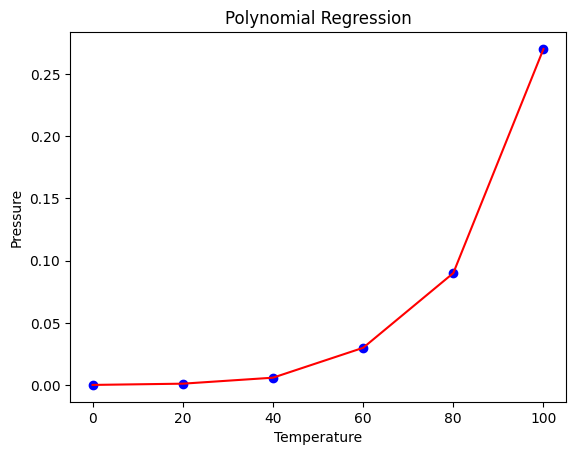

In [15]:
# Visualising the Polynomial Regression results 
plt.scatter(x, y, color = 'blue') 
  
plt.plot(x, lin_poly.predict(model_Poly), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

# Multivariate Linear Regression

In [16]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Importing the dataset 
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/auto-mpg.csv"
auto_df = pd.read_csv(file_name)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
# Check for the rows that contain "?"
auto_df[auto_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [18]:
# Get the indexes that have "?" instead of numbers
indexNames = auto_df[auto_df['horsepower'] == "?" ].index
 
# Delete these row indexes from dataFrame
auto_df.drop(indexNames , inplace=True)

In [19]:
# Just checking to see if they've been removed
auto_df[auto_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [20]:
auto_df['horsepower'] = auto_df['horsepower'].astype(float)

In [21]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [22]:
x = auto_df.iloc[:,1:8].values
y = auto_df.iloc[:,0].values

In [23]:
x.shape

(392, 7)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=0)

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [25]:
# cylinders	displacement	horsepower	weight	acceleration	model year	origin

# Data for Honda Prelude actual mpg is 24
Trial_Data = np.array([8, 220, 195, 3042 , 6.7, 98, 3])
Trial_Data = Trial_Data.reshape((-1, 7))
Trial_Data = Trial_Data.astype(float)

In [26]:
regressor.predict(X_test)

array([26.07629413, 25.59441524, 10.69635381, 32.16558517, 32.94641582,
       23.15642216, 34.07038267, 25.85709762, 20.42322781, 26.89789614,
       27.40129602, 13.69770331, 25.13660609,  8.86699055, 16.45714875,
       33.0693901 , 25.93290504, 12.78295625, 25.61459423, 26.9765456 ,
       20.45303566, 17.81483353, 23.6380299 , 26.72412284, 31.50776508,
       11.34083931, 28.65815883, 25.80459591, 22.62192047, 14.94372464,
       22.7634725 , 30.87122109, 23.99876368, 28.23938418, 21.65614576,
       29.48918572, 28.53532051, 12.01685358, 14.89920186, 10.14655118,
       13.75995439, 34.42742585, 30.66317461, 13.75306521, 30.557312  ,
       15.23846668, 29.89704094, 10.82632876, 17.39124221, 21.89298119,
       26.76803581, 14.81176707,  8.81066179, 23.11551122, 31.2672024 ,
       26.0062675 , 25.85367264, 20.7135161 , 31.57723807, 24.4002977 ,
       19.1428178 , 27.38505154, 30.98128503, 10.25395507, 25.75398408,
       16.90015638, 10.26357725, 29.01501772, 21.27099244, 33.11

# Support Vector Regression

In [27]:
from sklearn.svm import SVR

Support_vector_regressor = SVR()
Support_vector_regressor.fit(X_train,Y_train)

Support_vector_regressor.predict(X_test)

array([28.506061  , 22.77710568, 13.62468916, 28.49695038, 28.37116403,
       20.22828966, 29.50401273, 20.05394437, 21.07292871, 27.44257054,
       30.26475534, 13.81314438, 23.92828985, 13.01678265, 13.87788507,
       27.91821123, 23.5233821 , 14.9053034 , 27.53865539, 24.46938371,
       20.42743857, 17.30915527, 26.46365809, 22.2885766 , 28.37247261,
       14.35875522, 24.84744431, 24.09692727, 22.47001756, 16.99801012,
       23.38244852, 24.78529329, 25.7260348 , 29.53985766, 21.50324613,
       24.17316213, 30.61145686, 13.58135119, 14.45832953, 13.81877126,
       16.82208362, 30.18055815, 25.49461041, 14.66208067, 29.65475705,
       13.95193374, 25.60105027, 13.19389785, 15.84234391, 23.44051259,
       27.65899745, 17.58479142, 13.84813915, 26.47264565, 28.07731546,
       20.71454534, 21.39409538, 19.16723176, 30.48334992, 27.78535741,
       23.14286319, 28.61743992, 29.3657241 , 13.87260767, 28.07485932,
       15.82876146, 13.94910612, 24.74913855, 24.5039153 , 28.61

In [28]:
from sklearn.metrics import r2_score,mean_squared_error
R2_LR=r2_score(regressor.predict(X_test), Y_test)
print(R2_LR)
MSE_LR=mean_squared_error(regressor.predict(X_test), Y_test)
print(MSE_LR)

0.7744393899480315
11.125530446601507


In [29]:
R2_SVR=r2_score(Support_vector_regressor.predict(X_test), Y_test)
print(R2_SVR)
MSE_SVR=mean_squared_error(Support_vector_regressor.predict(X_test), Y_test)
print(MSE_SVR)

0.29996808248493645
22.25243178953727


# Which Model is better?

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Define the models
models = [
    {"name": "Support Vector Regressor", "model": SVR()},
    {"name": "Linear Regression", "model": LinearRegression()},
    {"name": "Polynomial Regression", "model": make_pipeline(PolynomialFeatures(2), LinearRegression())}
]

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)  
    r2 = metrics.r2_score(y_test, y_pred)
    
    print(f'Model: {name}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R2 Score): {r2}')
    print('----------------------------------')

for m in models:
    m["model"].fit(X_train, Y_train)
    evaluate_model(m["name"], m["model"], X_test, Y_test)

Model: Support Vector Regressor
Mean Absolute Error (MAE): 3.3139058218815056
Mean Squared Error (MSE): 22.25243178953727
Root Mean Squared Error (RMSE): 4.717248328160949
R-squared (R2 Score): 0.6382633430956612
----------------------------------
Model: Linear Regression
Mean Absolute Error (MAE): 2.5073142991993453
Mean Squared Error (MSE): 11.125530446601507
Root Mean Squared Error (RMSE): 3.3354955323911777
R-squared (R2 Score): 0.8191428142279117
----------------------------------
Model: Polynomial Regression
Mean Absolute Error (MAE): 3.0179407221912324
Mean Squared Error (MSE): 17.24745748428411
Root Mean Squared Error (RMSE): 4.153005837256204
R-squared (R2 Score): 0.7196244585997048
----------------------------------


## Linear Regression is the best model
- It has a Low MAE
- It has a Low MSE
- It has a Low RMSE 
- It has a high R2 Score